# Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on `Matplotlib`. Some tasks are a bit cumbersome to perform using just `Matplotlib`, such as automatically plotting one numeric variable vs. another numeric variable for each level of a third (categorical) variable. Using `Matplotlib` functions behind the scenes, `Seaborn` provides an easy-to-use syntax to perform such tasks. An additional benefit of `Seaborn` is that it works natively with `Pandas` dataframes, which is not the case for `Matplotlib`. This tutorial provides a brief overview of `Seaborn` for essential data visualization.

## Table of Contents
  * [The BRFSS Dataset](#The-BRFSS-Dataset)
  * [Scatter Plots](#Scatter-Plots)
  * [Boxplots](#Boxplots)
  * [Histograms](#Histograms)
  * [Line Plots](#Line-Plots)
  * [Regression Plots](#Regression-Plots)
  * [Scatter Plot Matrices](#Scatter-Plot-Matrices)

## The BRFSS Dataset

The dataset used in this tutorial is collected by the Centers for Disease Control and Prevention (CDC). As explained [here](https://www.featureranking.com/tutorials/statistics-tutorials/introduction-to-data/), the Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The BRFSS [website](http://www.cdc.gov/brfss) contains a complete description of the survey, including the research questions that motivate the study and many interesting results derived from the data. We will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

The variables in the dataset are genhlth, exerany, hlthplan, smoke100, height, weight, wtdesire, age, and gender. Each one of these variables corresponds to a question that was asked in the survey. For example, for genhlth, respondents were asked to evaluate their general health, responding either excellent, very good, good, fair or poor. The exerany variable indicates whether the respondent exercised in the past month (1) or did not (0). Likewise, hlthplan indicates whether the respondent had some form of health coverage (1) or did not (0). The smoke100 variable indicates whether the respondent had smoked at least 100 cigarettes in her lifetime. The other variables record the respondent’s height in inches, weight in pounds as well as their desired weight, wtdesire, age in years, and gender.

We begin by importing necessary modules and setting up `Matplotlib` environment followed by importing the dataset from the Cloud.

In [1]:
import random
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# import the pyplot module from the the matplotlib package
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set()

cdc = pd.read_csv('https://www.openintro.org/stat/data/cdc.csv')

In [2]:
cdc.describe(include='all')

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
count,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000
unique,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
freq,6972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10431
mean,NaN,0.745700,0.873800,0.472050,67.182900,169.68295,155.093850,45.068250,NaN
std,NaN,0.435478,0.332083,0.499231,4.125954,40.08097,32.013306,17.192689,NaN
min,NaN,0.000000,0.000000,0.000000,48.000000,68.00000,68.000000,18.000000,NaN
25%,NaN,0.000000,1.000000,0.000000,64.000000,140.00000,130.000000,31.000000,NaN
50%,NaN,1.000000,1.000000,0.000000,67.000000,165.00000,150.000000,43.000000,NaN
75%,NaN,1.000000,1.000000,1.000000,70.000000,190.00000,175.000000,57.000000,NaN


In [3]:
cdc.sample(10, random_state=999)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
6743,very good,1,1,0,71,170,170,23,m
19360,very good,1,0,1,64,120,117,45,f
8104,good,1,1,1,70,192,170,64,m
8535,excellent,1,1,1,64,165,140,67,f
8275,very good,1,1,0,69,130,140,69,m
3511,very good,0,1,0,63,128,128,37,f
1521,good,1,1,0,68,176,135,37,f
976,fair,0,1,1,64,150,125,43,f
14484,good,1,1,1,68,185,185,78,m
3591,fair,1,1,0,71,165,175,34,m


In [4]:
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
genhlth     20000 non-null object
exerany     20000 non-null int64
hlthplan    20000 non-null int64
smoke100    20000 non-null int64
height      20000 non-null int64
weight      20000 non-null int64
wtdesire    20000 non-null int64
age         20000 non-null int64
gender      20000 non-null object
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


Let's get a value count for each one of the categorical variables.

In [5]:
categorical_cols = cdc.columns[cdc.dtypes==object].tolist()
for col in categorical_cols:
    print(f"Column Name: {col}")
    print(cdc[col].value_counts())
    print("\n")

Column Name: genhlth
very good    6972
good         5675
excellent    4657
fair         2019
poor          677
Name: genhlth, dtype: int64


Column Name: gender
f    10431
m     9569
Name: gender, dtype: int64




## Scatter Plots

Let's first plot height vs. weight in the dataset with both univariate and bivariate plots.

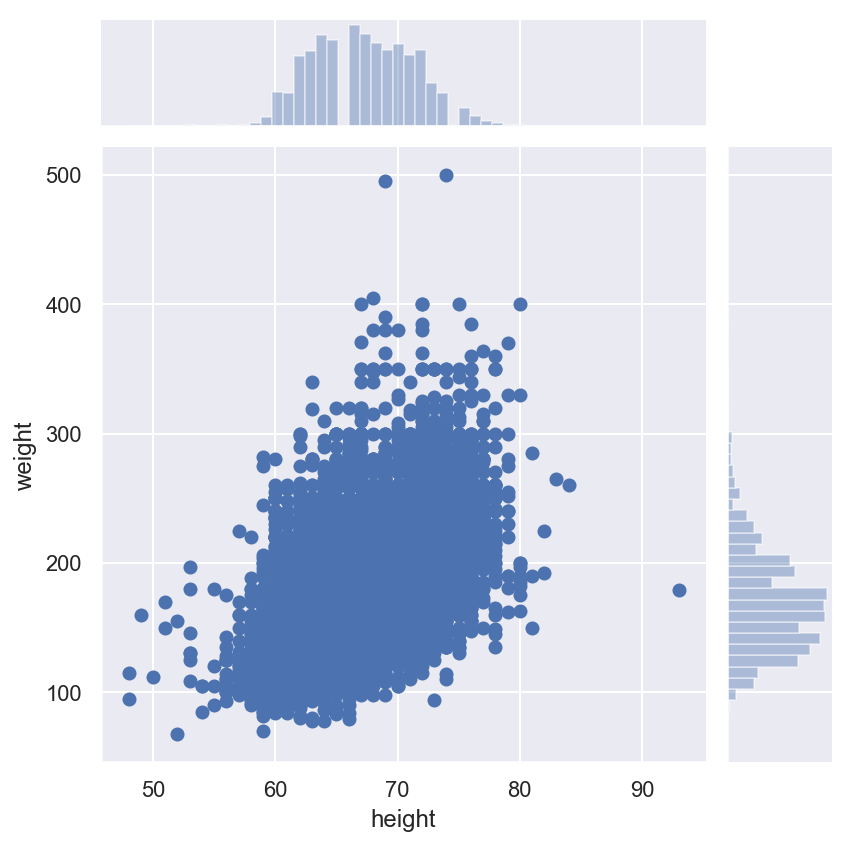

In [6]:
sns.jointplot(x="height", 
              y="weight", 
              data=cdc);

Let's again plot height vs. weight, but this time, let's break this by gender. For this task, we use the `relplot()`, which is a workhorse function in `Seaborn`. The default option with this function is "scatter'. You can change this by setting the *kind* option to "line" in order to get a line plot. Notice the `height` option below to make the plot slightly bigger. The `hue` option specifies how to color the data points.

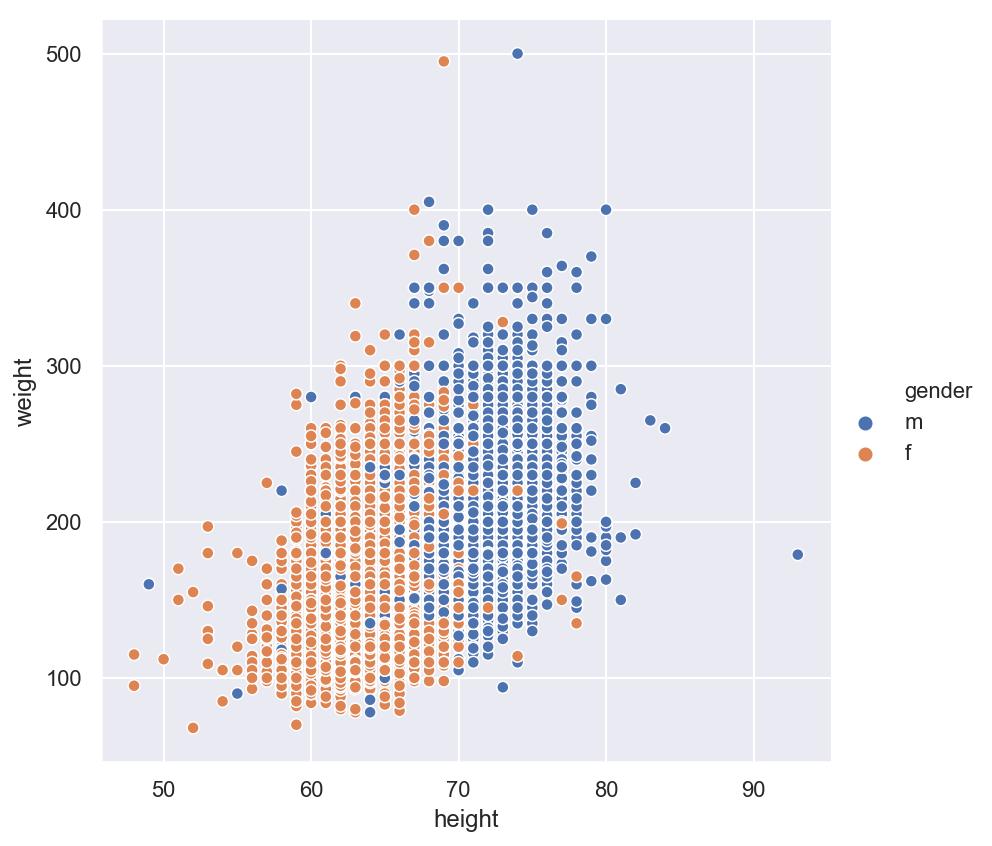

In [7]:
sns.relplot(x="height", 
            y="weight", 
            hue="gender", 
            height=6, 
            data=cdc);

We are curious if the above plot would be different for smokers vs. nonsmokers as well as respondents who exercised in the past month vs. who did not. For this, we use the `col` and `row` options.

This kind of plot is called a **facetted** plot.

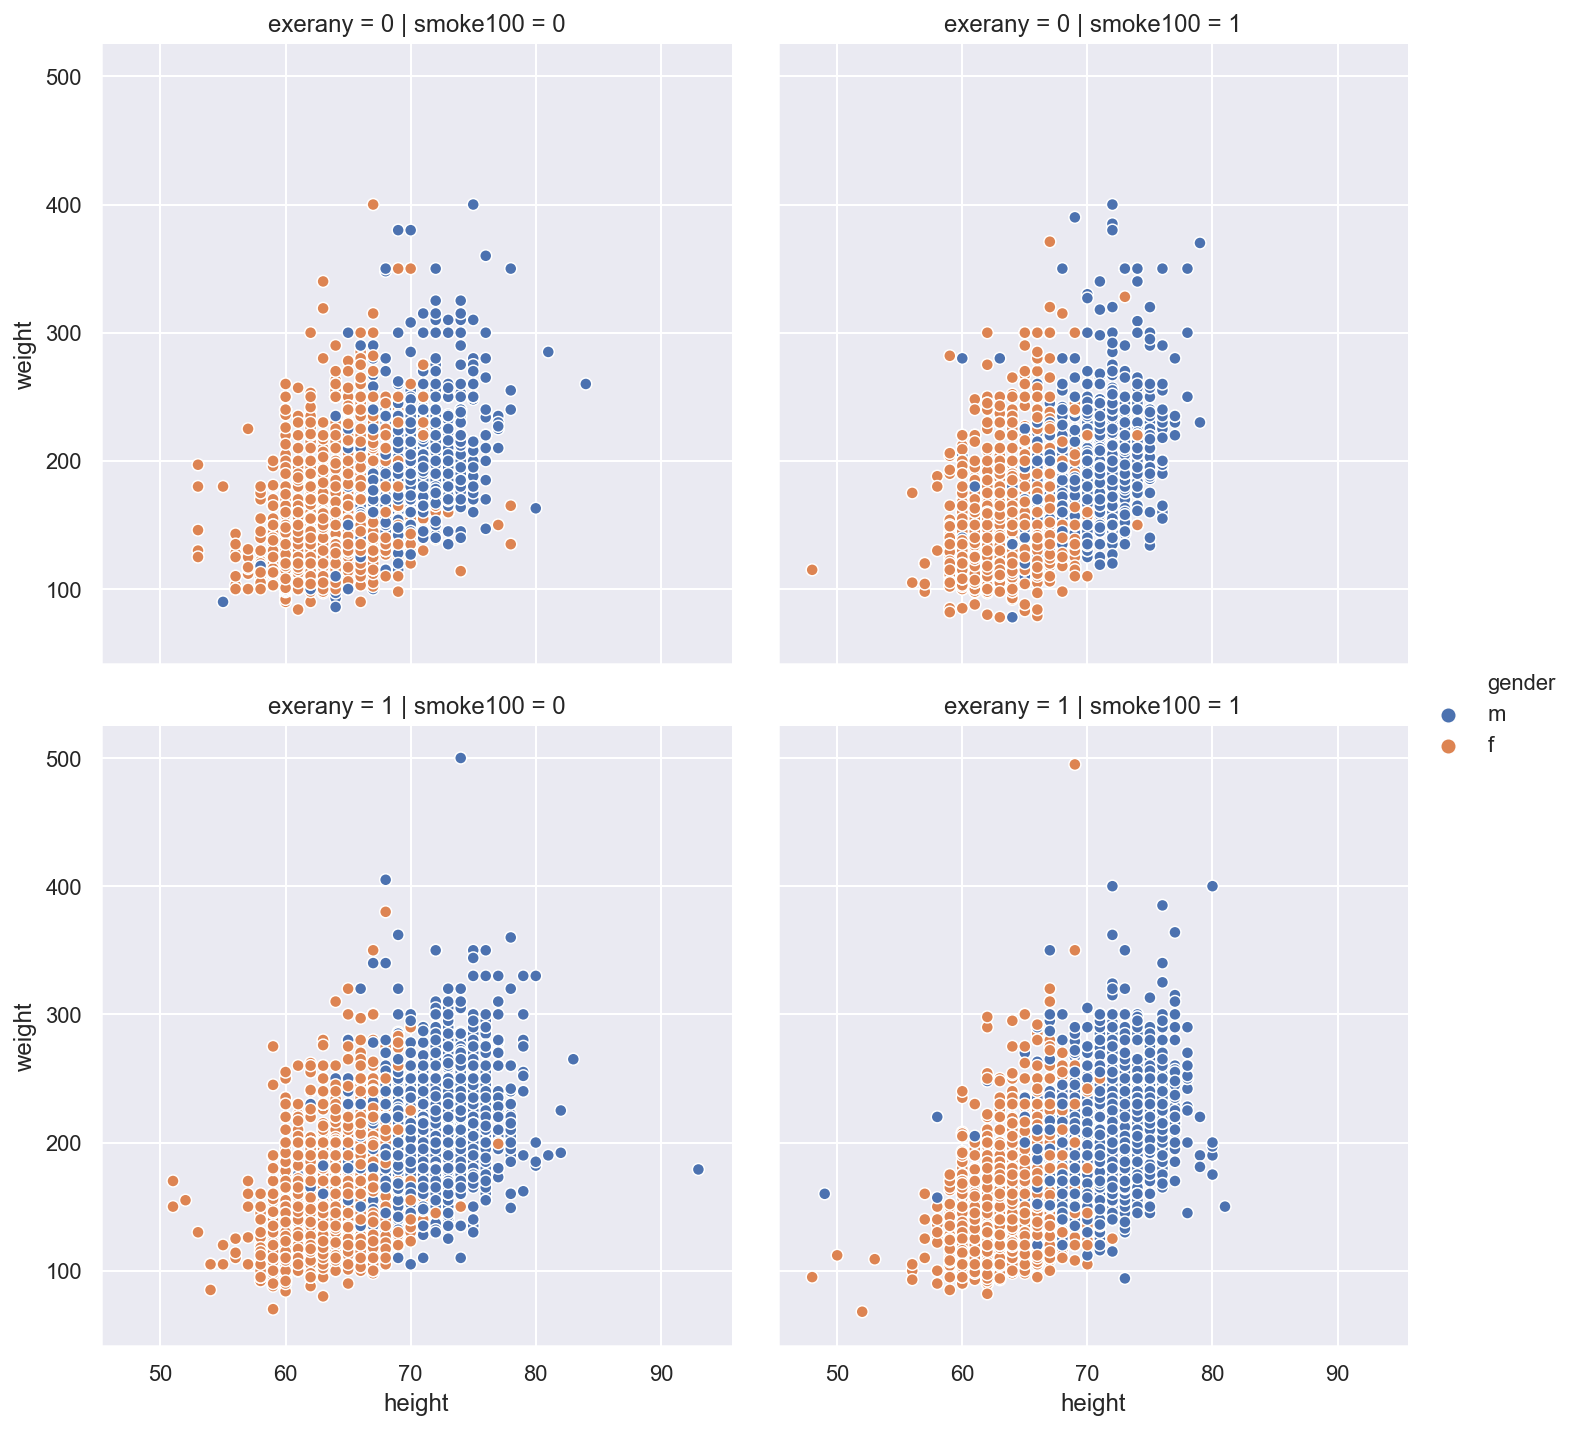

In [8]:
sns.relplot(x="height", 
            y="weight", 
            hue="gender", 
            col='smoke100',
            row='exerany',
            data=cdc);

## Boxplots

We would like to visualize the distribution of weights of the respondents, its quartiles and outliers (if any) with respect to each gender. For this, we need a `boxlot`. Keep in mind that the "box" in the middle contains exactly 50% of the respective data subset.

Do you see anything different with the people who are in excellent health?

Text(0.5, 0, 'general health')

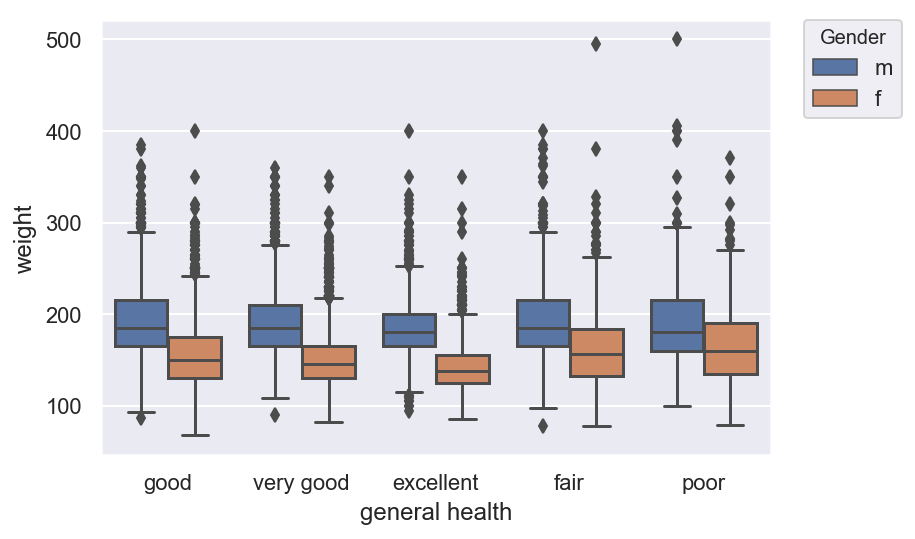

In [9]:
bp=sns.boxplot(x="genhlth",
               y="weight",
               hue="gender", 
               data=cdc);

# position the legend outside the chart
bp.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,
          title="Gender");

# set the x-axis title
bp.set_xlabel("general health")

## Histograms

Let's get a histogram of the heights and weights of the survey respondents. For both histogtams, we will overlay the kernel density estimate (KDE).

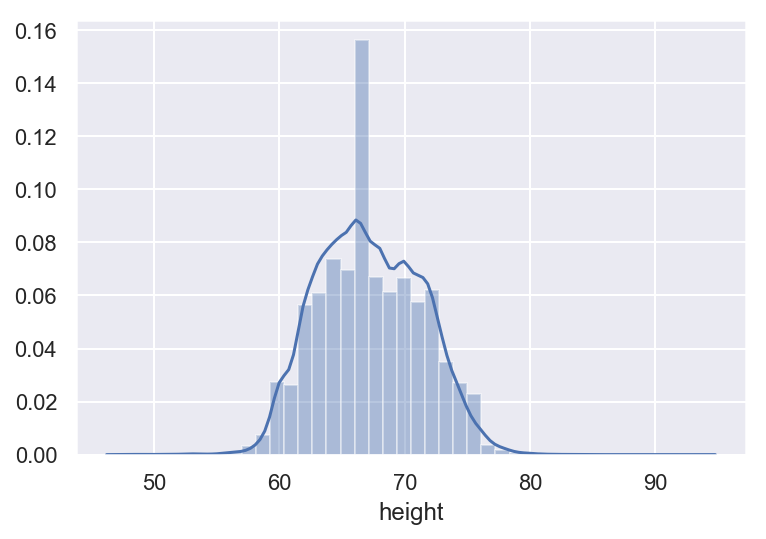

In [10]:
sns.distplot(cdc['height'],
             kde=True,
             bins=40);

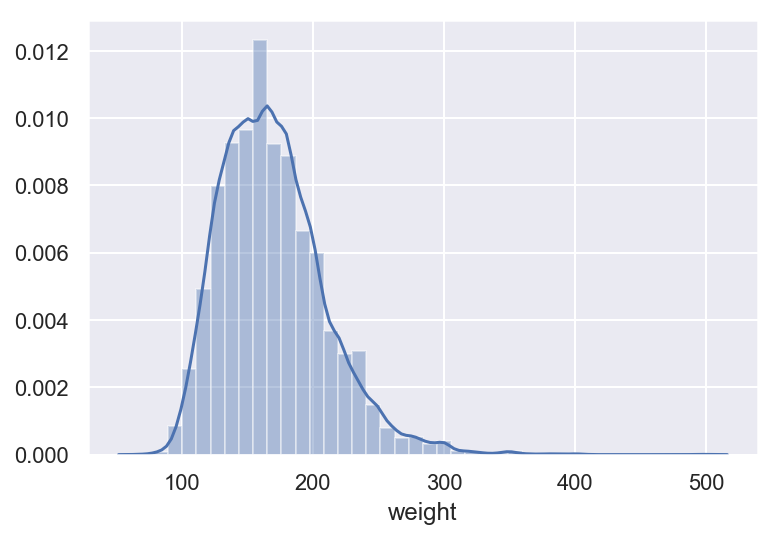

In [11]:
sns.distplot(cdc['weight'],
             kde=True,
             bins=40);

Let's get a histogram of weights of the respondents, this time across the gender dimension as a **faceted** histogram.

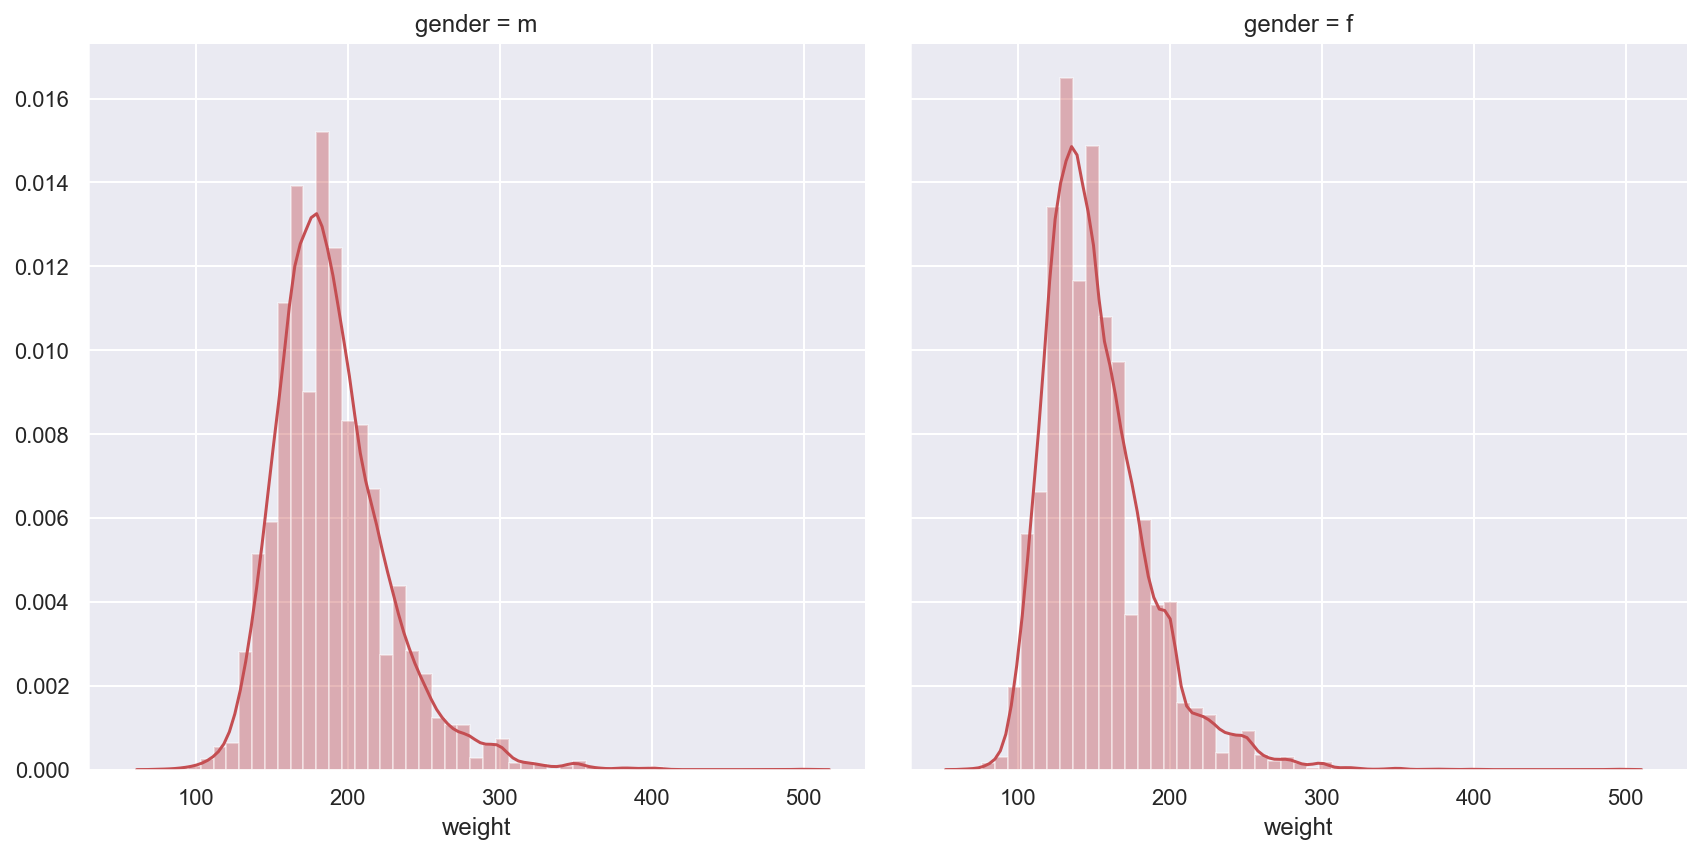

In [12]:
s=sns.FacetGrid(cdc,
                height=6,
                col="gender");

s=s.map(sns.distplot,
        'weight',
        color="r");

It might also be a good idea to overlay the weight distribution for males and females in the same plot.

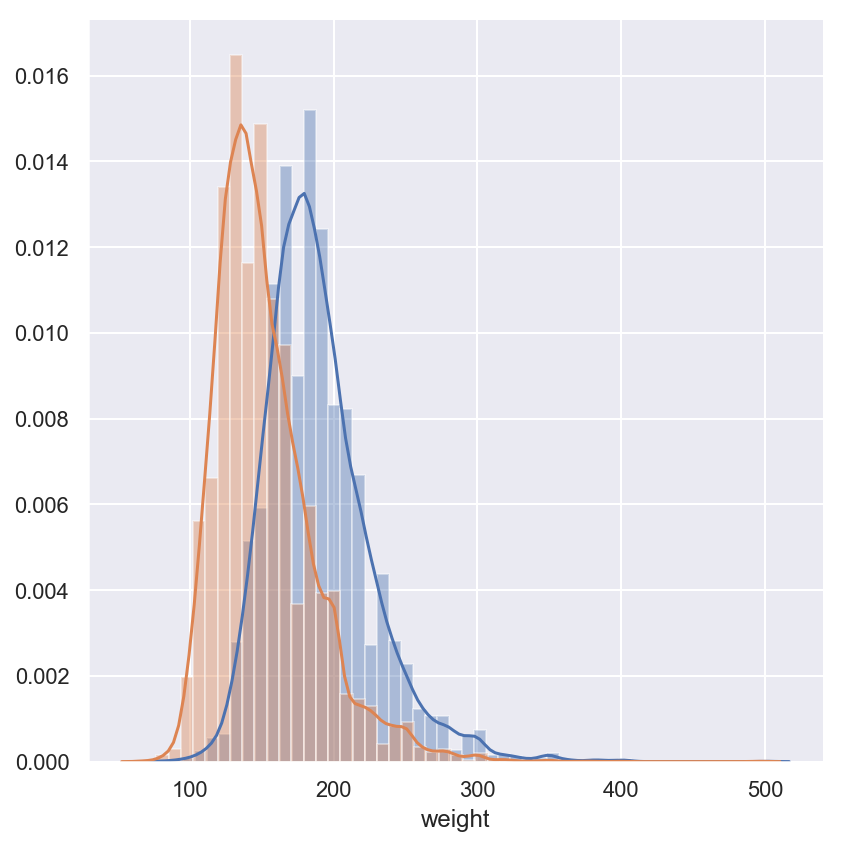

In [13]:
s=sns.FacetGrid(cdc,
                height=6,
                hue="gender");

s=s.map(sns.distplot,
        'weight');

## Line Plots

Our BRFSS dataset does not really allow for any meaningful line plots, so we will cook up a scenario for one. We will take the first 18 rows and pretend that they are measurements for the past 18 years.

In [14]:
cdc_series = pd.DataFrame({'time':pd.date_range('2000-12-31', periods=18, freq='12M'),
                           'height':cdc['height'].iloc[0:18],
                           'weight':cdc['weight'].iloc[0:18],
                           })

cdc_series.head()

,time,height,weight
0,2000-12-31,70,175
1,2001-12-31,64,125
2,2002-12-31,60,105
3,2003-12-31,66,132
4,2004-12-31,61,150


In [15]:
# move the height and weight columns to rows
# using the melt() Pandas function:

cdc_series_long = pd.melt(cdc_series,
                          id_vars=['time'],
                          var_name='measurement_type',
                          value_name='values')

cdc_series_long.sample(5, random_state=1)

,time,measurement_type,values
30,2012-12-31,weight,185
34,2016-12-31,weight,156
28,2010-12-31,weight,186
3,2003-12-31,height,66
19,2001-12-31,weight,125


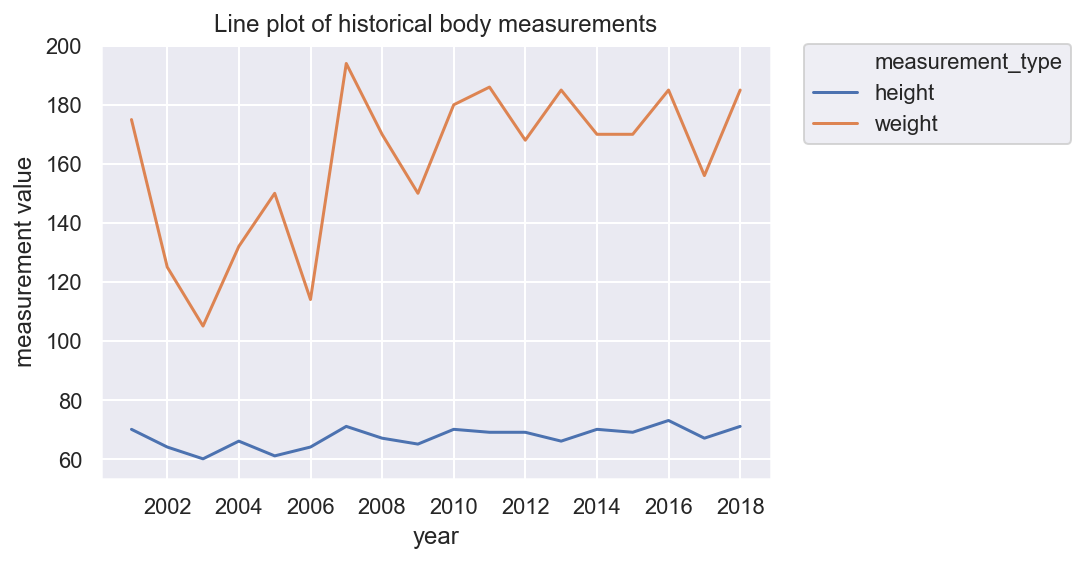

In [16]:
lp = sns.lineplot(x="time", 
                  y="values",
                  hue="measurement_type",
                  data=cdc_series_long);
 
# position the legend outside the chart
lp.legend(bbox_to_anchor=(1.05, 1),
          loc=2, 
          borderaxespad=0.0);

# add a title and axes labels
lp.set(title='Line plot of historical body measurements',
       xlabel='year', 
       ylabel='measurement value');

## Regression Plots

Seaborn provides an easy interface for regression plots via the `lmplot()` function. For illustration, we will use the famous iris flower data set, which is available within the `Seaborn` module. 

A diagram of iris flower parts is shown below (source: [US Forest Services](https://www.fs.fed.us/wildflowers/beauty/iris/flower.shtml)).

<img src=https://www.fs.fed.us/wildflowers/beauty/iris/images/flower/blueflagiris_flower_lg.jpg width="300">


In [17]:
# load the iris dataset
iris = sns.load_dataset("iris")

In [18]:
iris.sample(10, random_state=999)

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,versicolor
64,5.6,2.9,3.6,1.3,versicolor
80,5.5,2.4,3.8,1.1,versicolor
40,5.0,3.5,1.3,0.3,setosa
36,5.5,3.5,1.3,0.2,setosa
0,5.1,3.5,1.4,0.2,setosa
44,5.1,3.8,1.9,0.4,setosa
82,5.8,2.7,3.9,1.2,versicolor
126,6.2,2.8,4.8,1.8,virginica
17,5.1,3.5,1.4,0.3,setosa


In [19]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

First let's plot petal width vs. petal length without breaking by the species. We will do a scatter plot overlayed with a third-order regression fit.

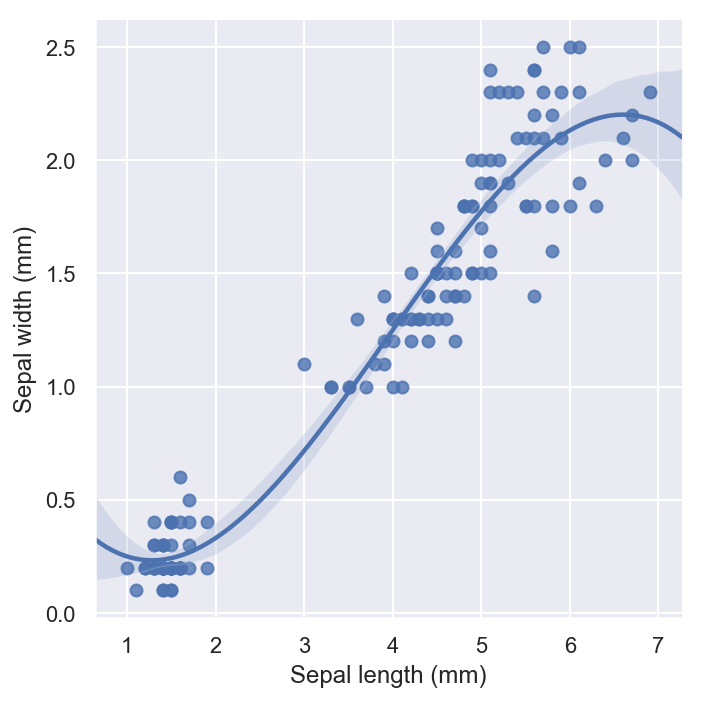

In [20]:
g = sns.lmplot(x="petal_length", 
               y="petal_width", 
               order=3,
               data=iris);

# set axis labels
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)");

Let's now break the above regression plot with respect to the species variable and fit a first-order regression to each species' respective data points in the plot.

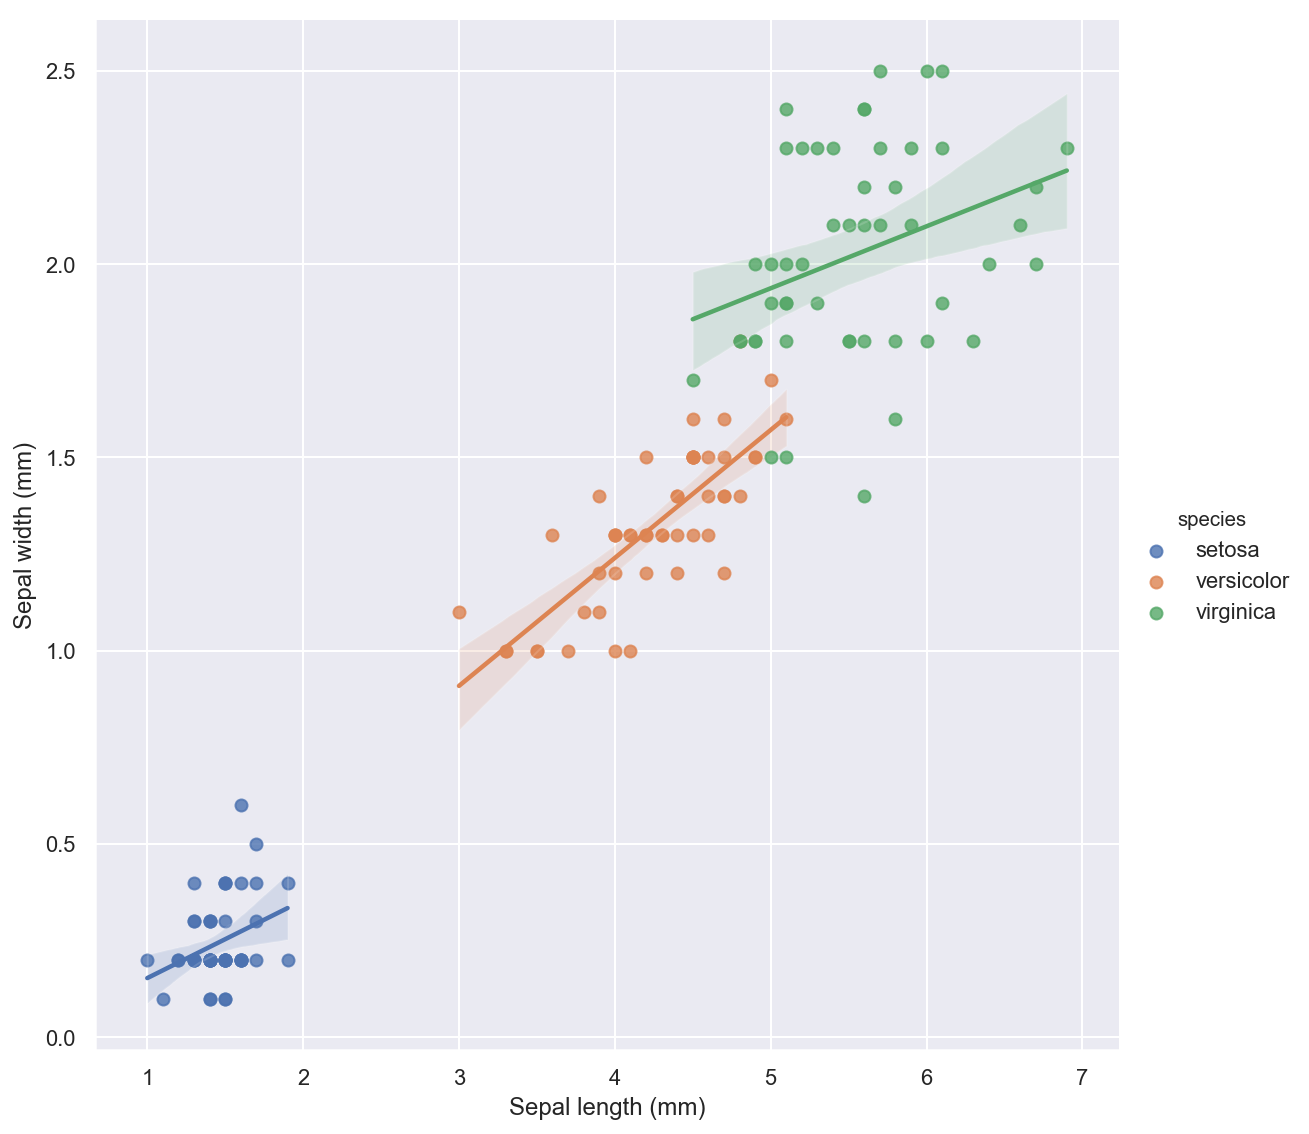

In [21]:
g = sns.lmplot(x="petal_length", 
               y="petal_width", 
               hue="species",
               truncate=True, 
               height=8, 
               data=iris);

# set axis labels
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)");

The above plot indicates that breaking the plot by species seems to be a good idea in terms of a regression fit. Let's do a faceted regression plot using the species variable as the column parameter.

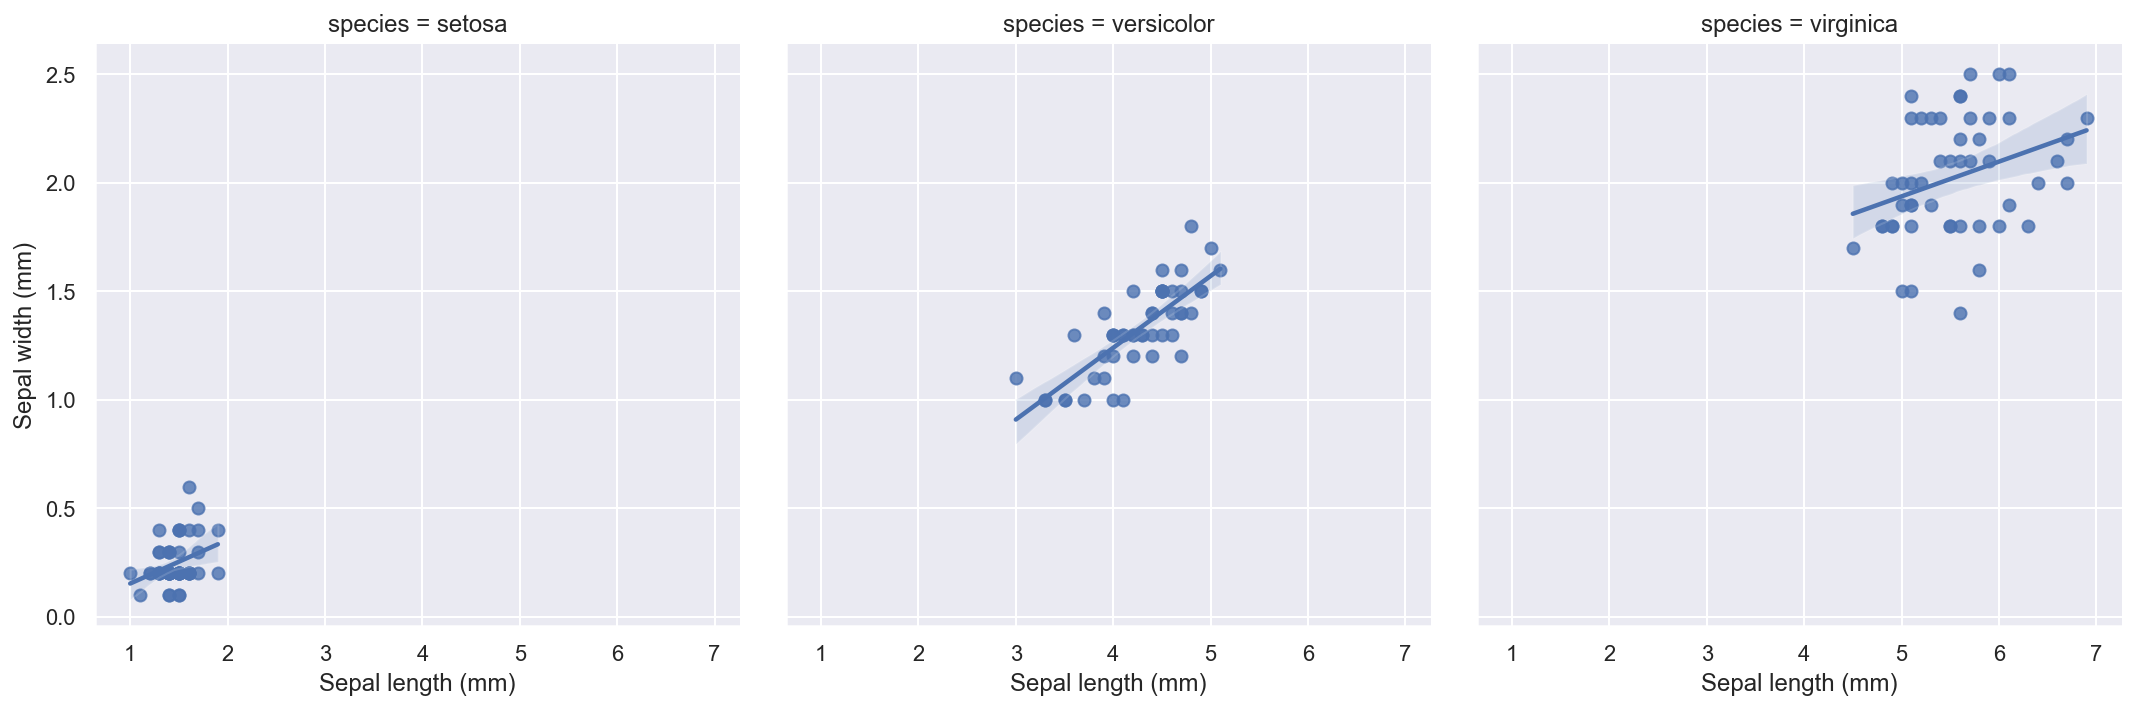

In [22]:
g = sns.lmplot(x="petal_length", 
               y="petal_width", 
               col="species",
               truncate=True, 
               data=iris);

# set axis labels
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)");

## Scatter Plot Matrices

Let's get a pairwise scatterplot matrix for all the numeric variables in the iris dataset sliced and diced by the species variable.

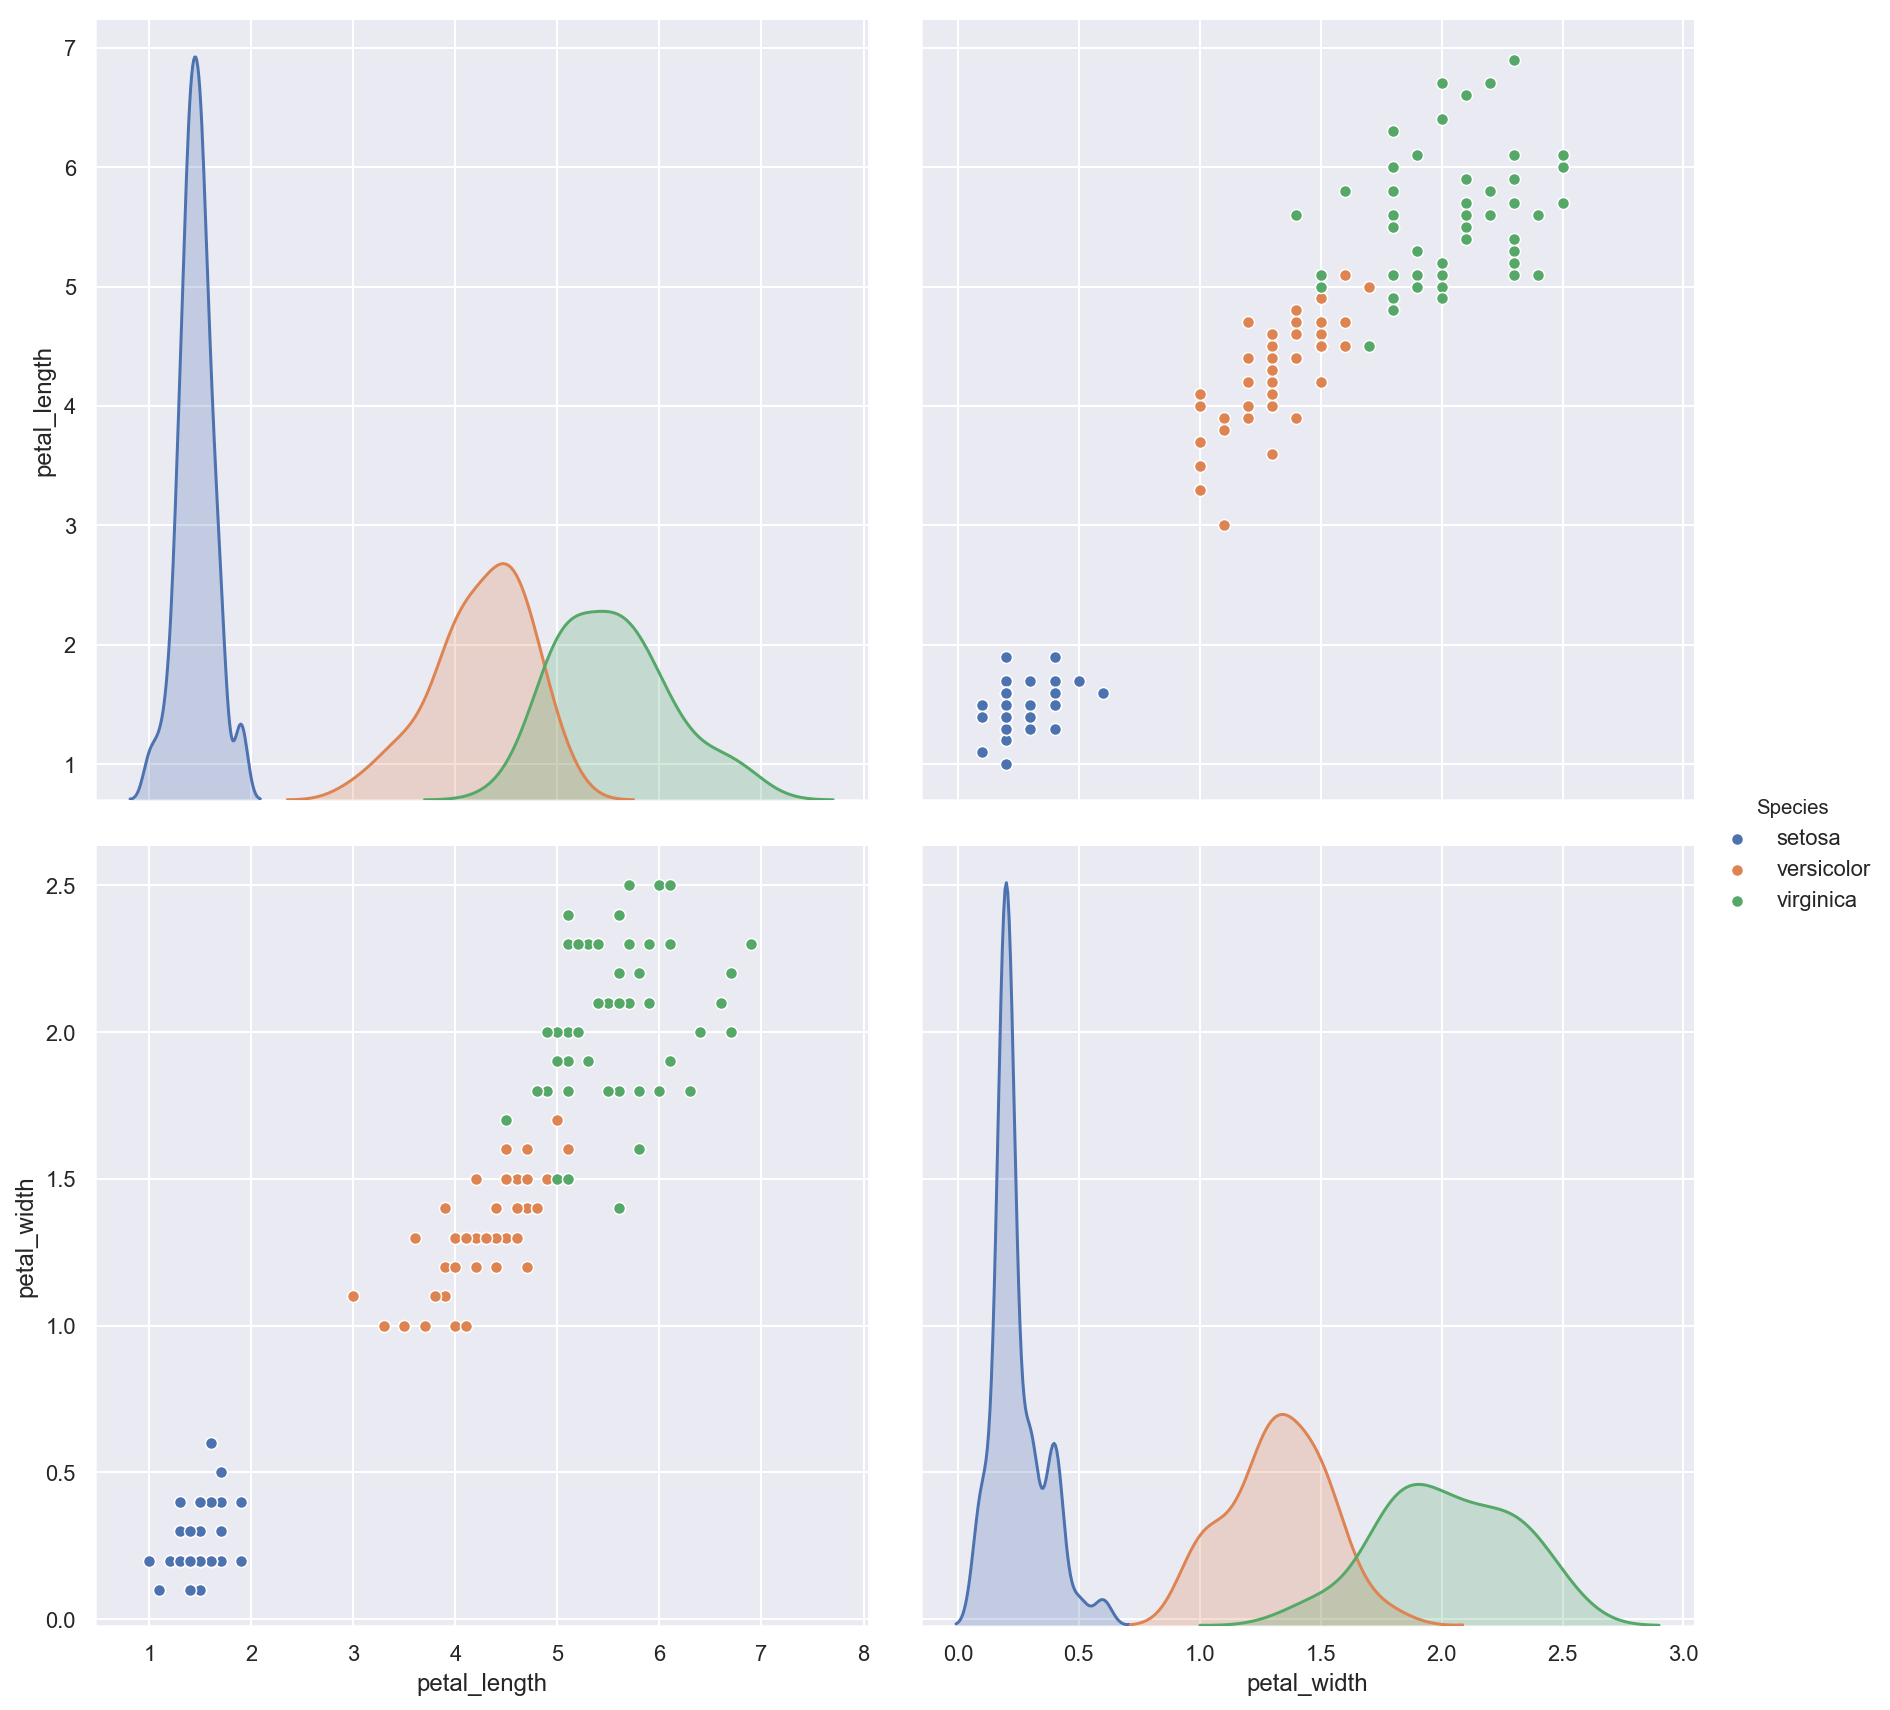

In [23]:
sp = sns.pairplot(iris,
                  vars=['petal_length', 'petal_width'],
                  height=6,
                  hue='species');

# change the legend title
sp._legend.set_title('Species'); 

`Seaborn` is far more capable than what is illustrated in this short tutorial. For more details, please refer to the official API page [here](https://seaborn.pydata.org/api.html).

***
www.featureranking.com